In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Set some Pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

## Plotting in Pandas
Pandas includes methods for DataFrame and Series objects that are relatively high-level, and that make reasonable assumptions about how the plot should look.

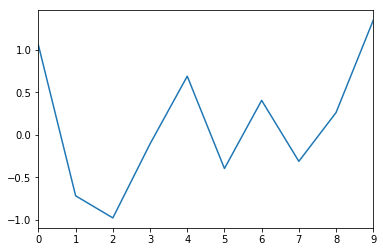

In [2]:
normals = pd.Series(np.random.normal(size=10))
normals.plot()

Similarly, for a DataFrame:

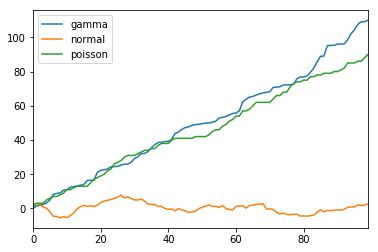

In [3]:
variables = pd.DataFrame({'normal': np.random.normal(size=100), 
                       'gamma': np.random.gamma(1, size=100), 
                       'poisson': np.random.poisson(size=100)})
variables.cumsum(0).plot()

As an illustration of the high-level nature of Pandas plots, we can split multiple series into subplots with a single argument for `plot`:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11bf94898>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11c125160>], dtype=object)

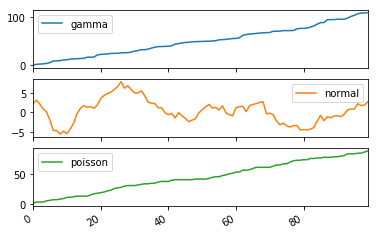

In [4]:
variables.cumsum(0).plot(subplots=True)

Or, we may want to have some series displayed on the secondary y-axis, which can allow for greater detail and less empty space:

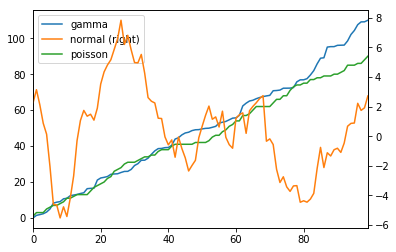

In [5]:
variables.cumsum(0).plot(secondary_y='normal')

If we would like a little more control, we can use matplotlib's `subplots` function directly, and manually assign plots to its axes:

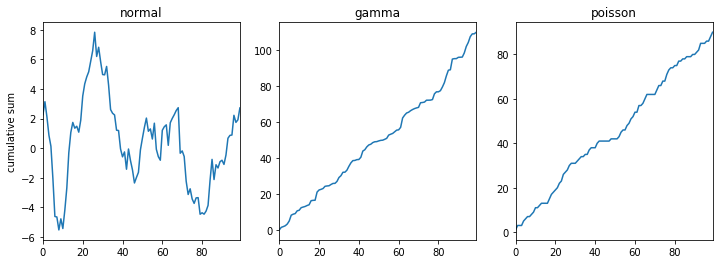

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i,var in enumerate(['normal','gamma','poisson']):
    variables[var].cumsum(0).plot(ax=axes[i], title=var)
axes[0].set_ylabel('cumulative sum')

## Bar plots

Bar plots are useful for displaying and comparing measurable quantities, such as counts or volumes. In Pandas, we just use the `plot` method with a `kind='bar'` argument.

For this series of examples, let's load up the planets dataset:

In [7]:
planets = pd.read_csv("data/planets.csv", comment='#',na_values=['-inf'])


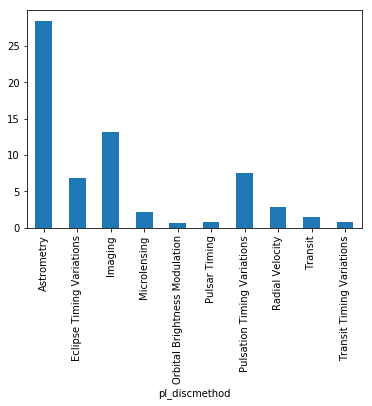

In [8]:
planets.groupby('pl_discmethod').pl_bmassj.mean().plot(kind='bar')

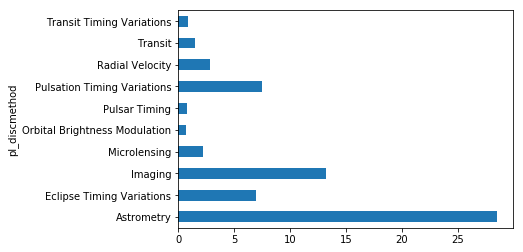

In [9]:
planets.groupby('pl_discmethod').pl_bmassj.mean().plot(kind='barh')

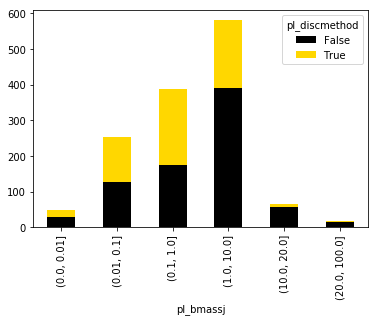

In [10]:
tranmass = pd.crosstab([pd.cut(planets.pl_bmassj, [0.,0.01,0.1,1,10,20,100])], (planets.pl_discmethod=='Transit').astype(bool))
tranmass.plot(kind='bar', stacked=True, color=['black','gold'], grid=False)

Another way of comparing the groups is to look at the discovery *rate*, by adjusting for the number planets in each group.

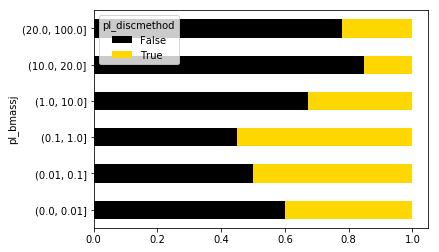

In [11]:
tranmass.div(tranmass.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, color=['black','gold'])

## Histograms

Frequenfly it is useful to look at the *distribution* of data before you analyze it. Histograms are a sort of bar graph that displays relative frequencies of data values; hence, the y-axis is always some measure of frequency. This can either be raw counts of values or scaled proportions.

For example, we might want to see how the radii of discovered planets are distributed:

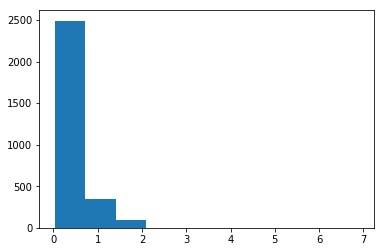

In [12]:
planets.pl_radj.hist(grid=False)


The `hist` method puts the continuous fare values into **bins**, trying to make a sensible decision about how many bins to use (or equivalently, how wide the bins are). We can override the default value (10):

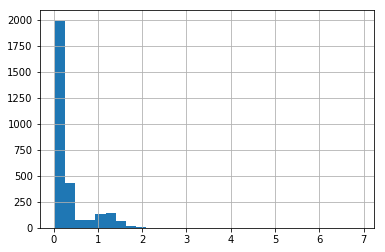

In [13]:
planets.pl_radj.hist(bins=30)

A **density plot** is similar to a histogram in that it describes the distribution of the underlying data, but rather than being a pure empirical representation, it is an *estimate* of the underlying "true" distribution. As a result, it is smoothed into a continuous line plot. We create them in Pandas using the `plot` method with `kind='kde'`, where `kde` stands for **kernel density estimate**.

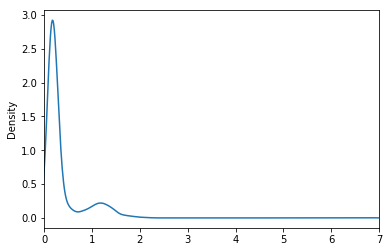

In [14]:

planets.pl_radj.dropna().plot(kind='kde', xlim=(0,7))

Often, histograms and density plots are shown together:

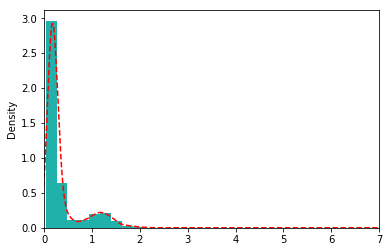

In [15]:
planets.pl_radj.hist(bins=30, normed=True, color='lightseagreen')
planets.pl_radj.dropna().plot(kind='kde', xlim=(0,7), style='r--')

Here, we had to normalize the histogram (`normed=True`), since the kernel density is normalized by definition (it is a probability distribution).

We will explore kernel density estimates more in the next section.

## Pie plot
You can create a pie plot with DataFrame.plot.pie() or Series.plot.pie(). If your data includes any NaN, they will be automatically filled with 0. A ValueError will be raised if there are any negative values in your data.


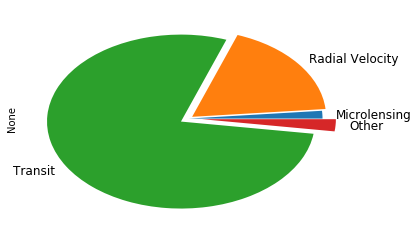

In [16]:
planets_groups = planets.groupby("pl_discmethod").size()
other=0
names=[]
for disc in planets_groups:
    
    if disc <=50.:
        
        other=other+disc
        
        
planets_groups=planets_groups[planets_groups >=50]  
planets_groups['Other']=other
explode = np.linspace(0,0.1,len(planets_groups))
planets_groups.plot(kind='pie', fontsize=12, explode=explode)

## Scatterplots


Scatterplots are useful for data exploration, where we seek to uncover relationships among variables. There are no scatterplot methods for Series or DataFrame objects; we must instead use the matplotlib function `scatter`.

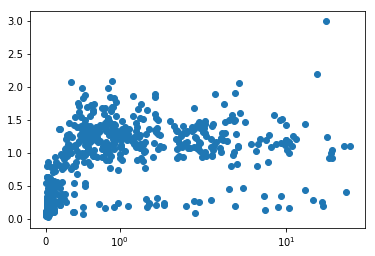

In [17]:
ax= plt.subplot()
plt.scatter(planets.pl_bmassj,planets.pl_radj)
ax.set_xscale('symlog')


We can add additional information to scatterplots by assigning variables to either the size of the symbols or their colors.

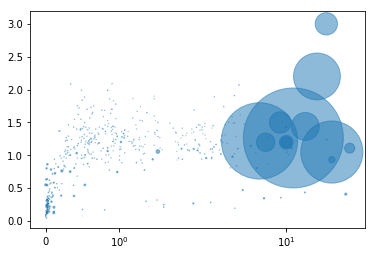

In [18]:
ax= plt.subplot()
plt.scatter(planets.pl_bmassj,planets.pl_radj, s=planets.pl_orbsmax*5, alpha=0.5)
ax.set_xscale('symlog')


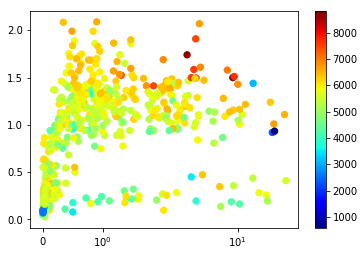

In [19]:
ax= plt.subplot()
pl=planets[planets.st_teff <=10000.]
plt.scatter(pl.pl_bmassj,pl.pl_radj, c=pl.st_teff, s=40, cmap='jet')
ax.set_xscale('symlog')
plt.colorbar()


To view scatterplots of a large numbers of variables simultaneously, we can use the `scatter_matrix` function that was recently added to Pandas. It generates a matrix of pair-wise scatterplots, optiorally with histograms or kernel density estimates on the diagonal.

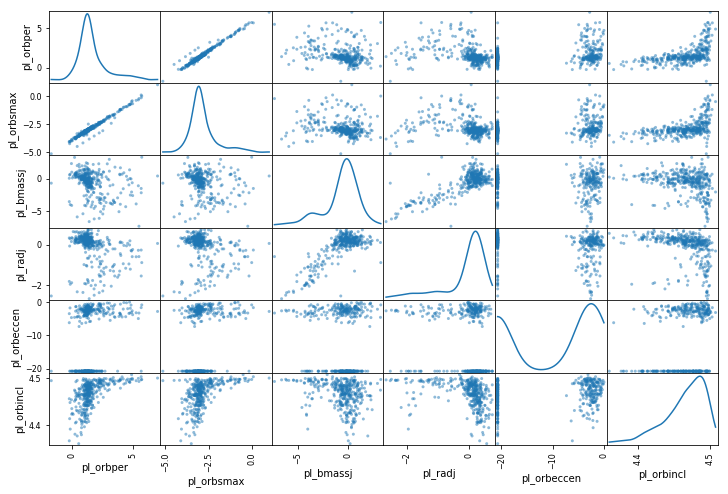

In [20]:
logpl=planets.filter(['pl_orbper','pl_orbsmax','pl_bmassj','pl_radj','pl_orbeccen','pl_orbincl'],axis=1)
logpl=logpl.dropna()
logpl=logpl.replace(0,1e-9)
logpl=np.log(logpl)

_ = pd.plotting.scatter_matrix(logpl.loc[:,['pl_orbper','pl_orbsmax','pl_bmassj','pl_radj','pl_orbeccen','pl_orbincl']], figsize=(12,8), diagonal='kde')


